In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('cause_of_deaths dataset.csv')
data.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [5]:
data.shape

(6120, 34)

In [6]:
data.isna().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [7]:
data=data.drop(['Country/Territory'],1)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Code'])
data['Code']=df1

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Code                                        6120 non-null   int32
 1   Year                                        6120 non-null   int64
 2   Meningitis                                  6120 non-null   int64
 3   Alzheimer's Disease and Other Dementias     6120 non-null   int64
 4   Parkinson's Disease                         6120 non-null   int64
 5   Nutritional Deficiencies                    6120 non-null   int64
 6   Malaria                                     6120 non-null   int64
 7   Drowning                                    6120 non-null   int64
 8   Interpersonal Violence                      6120 non-null   int64
 9   Maternal Disorders                          6120 non-null   int64
 10  HIV/AIDS                            

In [11]:
y=[]
y=data.sum()


In [12]:
y.sort_values(ascending=False)

Cardiovascular Diseases                       447741982
Neoplasms                                     229758538
Chronic Respiratory Diseases                  104605334
Lower Respiratory Infections                   83770038
Neonatal Disorders                             76860729
Diarrheal Diseases                             66235508
Digestive Diseases                             65638635
Tuberculosis                                   45850603
Cirrhosis and Other Chronic Liver Diseases     37479321
HIV/AIDS                                       36364419
Road Injuries                                  36296469
Diabetes Mellitus                              31448872
Alzheimer's Disease and Other Dementias        29768839
Chronic Kidney Disease                         28911692
Malaria                                        25342676
Self-harm                                      23713931
Nutritional Deficiencies                       13792032
Interpersonal Violence                         1

In [43]:
data.describe()

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,101.500000,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,58.893832,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,0.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50.750000,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,101.500000,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,152.250000,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,203.000000,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [15]:
#subplot has been drawn

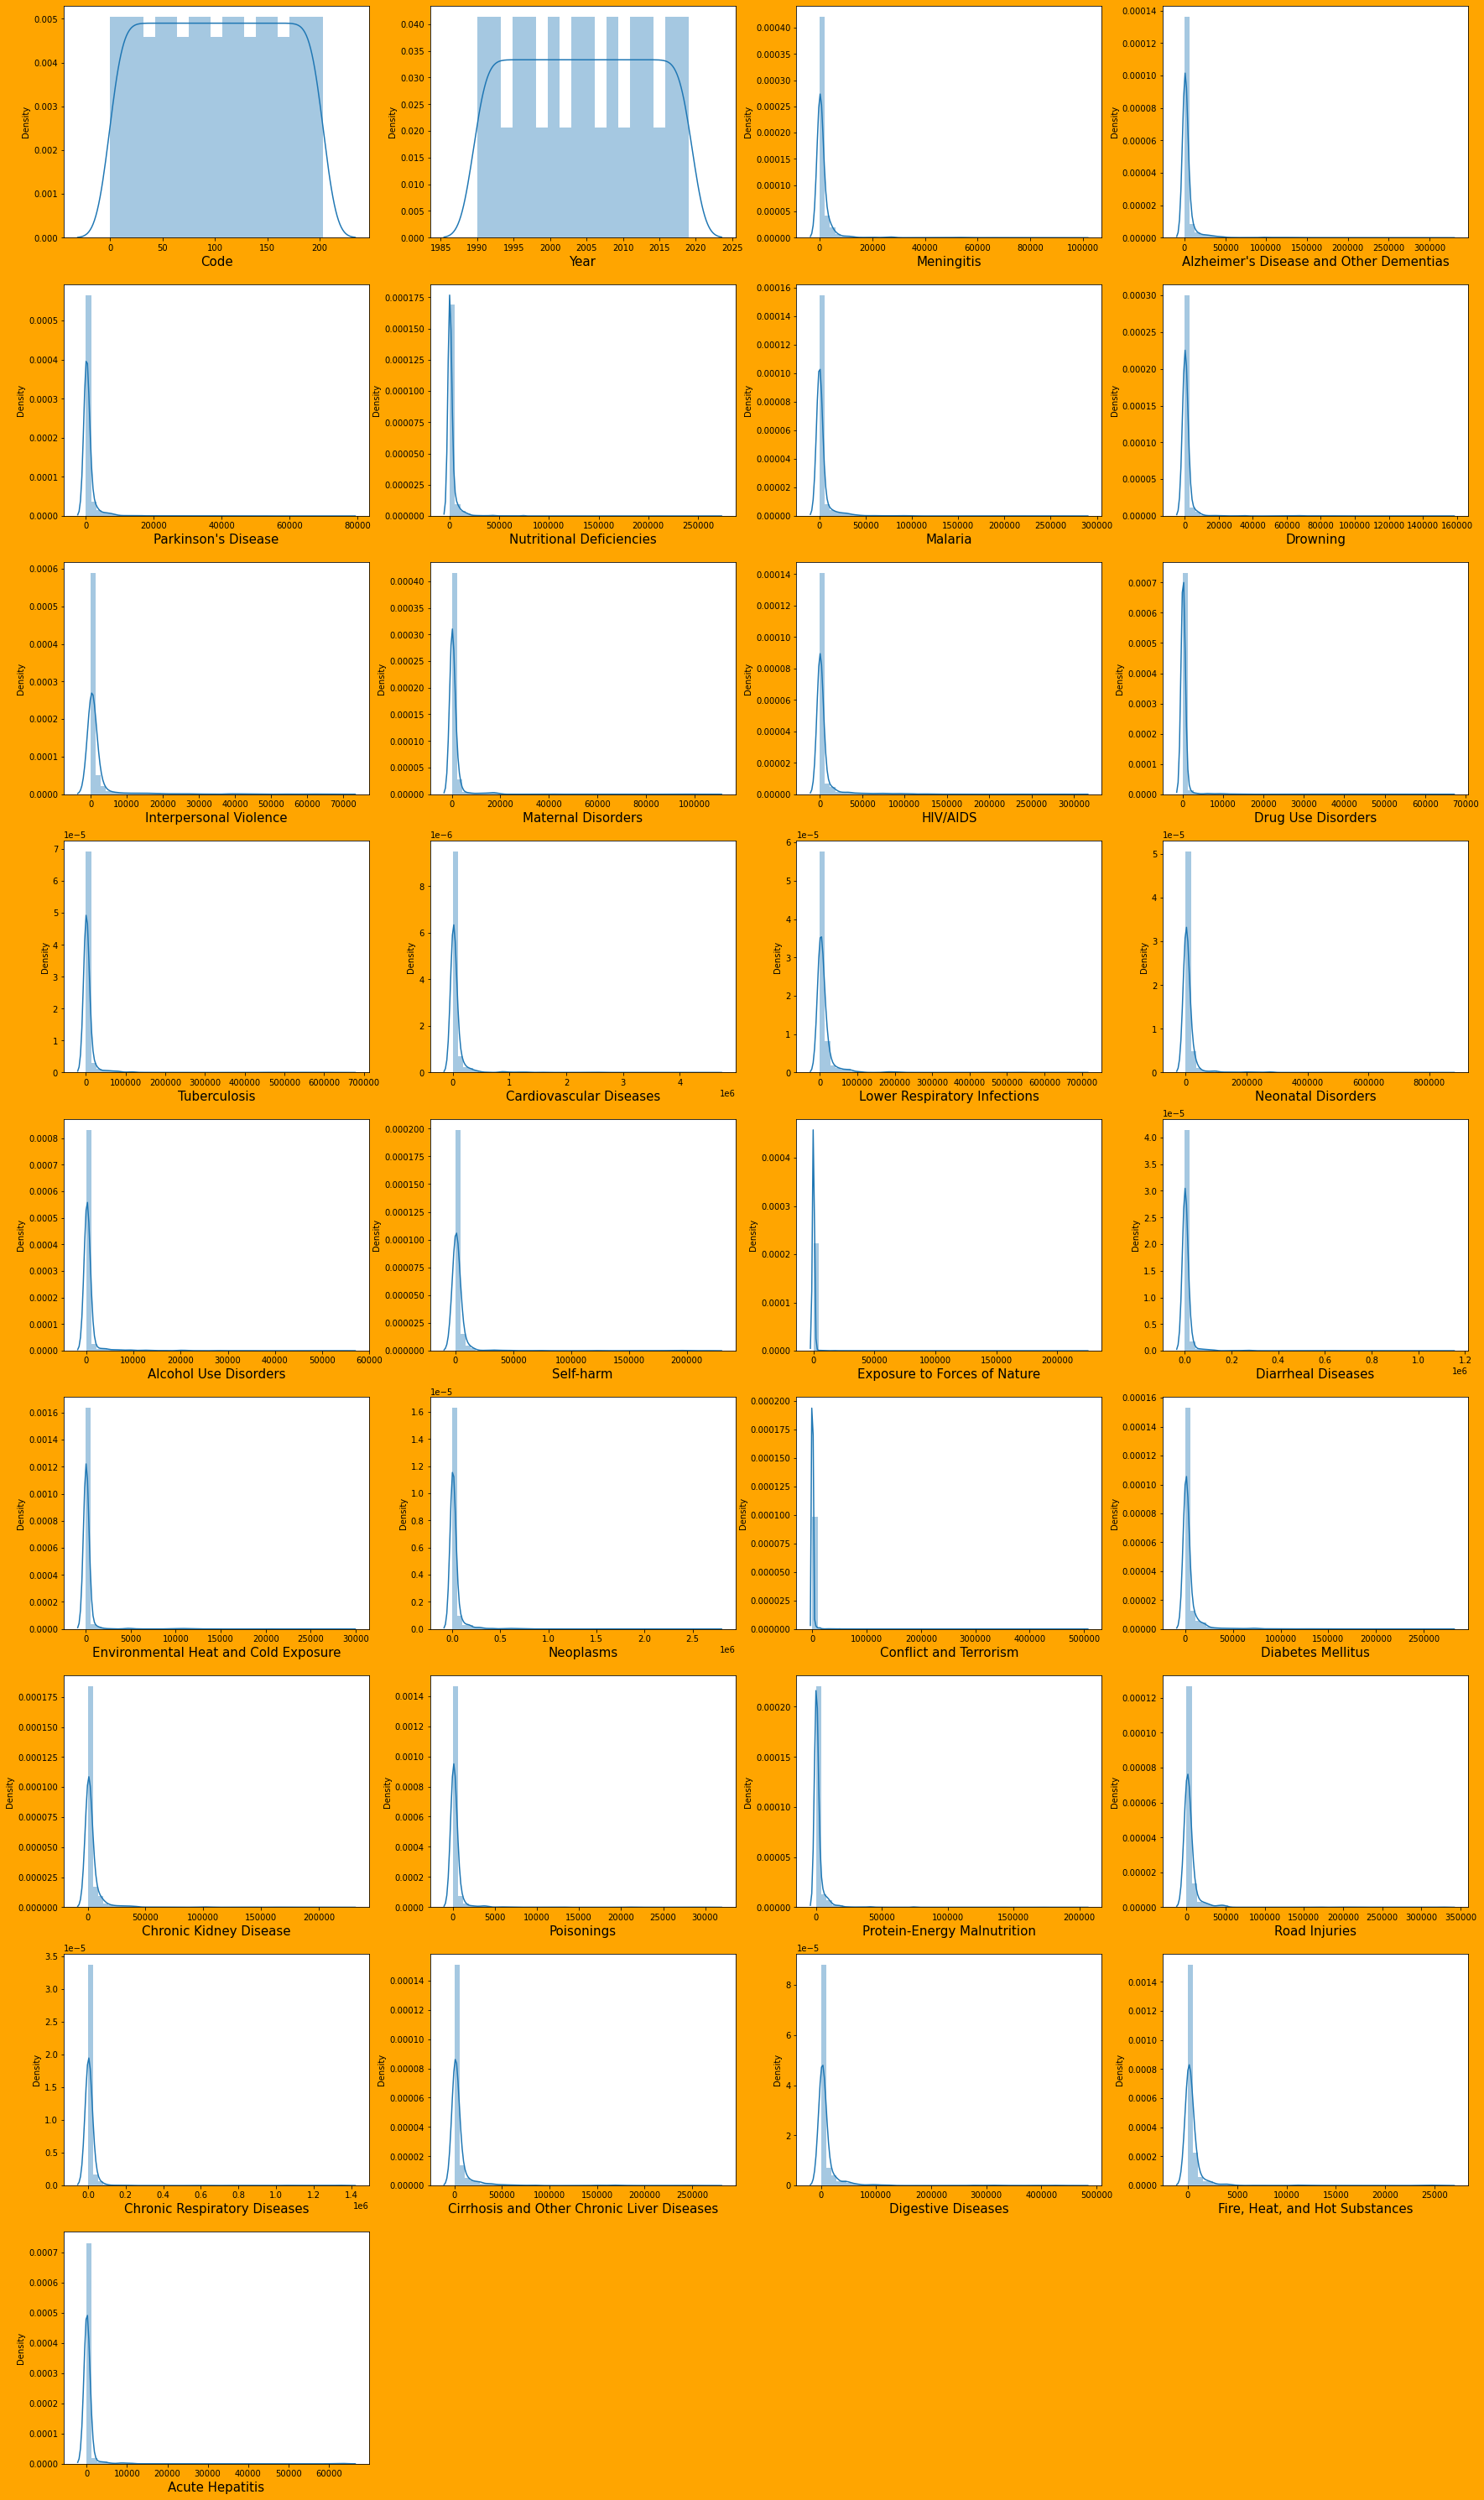

In [16]:
plt.figure(figsize=(30,60),facecolor='orange')
plotnumber=1
for column in data:
    if plotnumber<=35:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [17]:
data.skew()

Code                                           0.000000
Year                                           0.000000
Meningitis                                     8.248599
Alzheimer's Disease and Other Dementias        8.695288
Parkinson's Disease                            9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8

In [18]:
#applying z-score method to remove the skewness from the data  


In [19]:
from scipy.stats import zscore

In [20]:
z=np.abs(zscore(data))


In [21]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([   0,    0,    0, ..., 6119, 6119, 6119], dtype=int64), array([ 0,  1,  2, ..., 30, 31, 32], dtype=int64))
(6120, 33)


In [26]:
#considering z value less than 3 now it is covering nearly 95% of given data

In [27]:
data=data[(z<3).all(axis=1)]
data

,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,0,1990,2159,1116,371,2087,93,1370,1538,2655,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,0,1991,2218,1136,374,2153,189,1391,2001,2885,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,0,1992,2475,1162,378,2441,239,1514,2299,3315,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,0,1993,2812,1187,384,2837,108,1687,2589,3671,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,0,1994,3027,1211,391,3081,211,1809,2849,3863,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,203,2015,1439,754,215,3019,2518,770,1302,1355,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,203,2016,1457,767,219,3056,2050,801,1342,1338,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,203,2017,1460,781,223,2990,2116,818,1363,1312,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,203,2018,1450,795,227,2918,2088,825,1396,1294,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


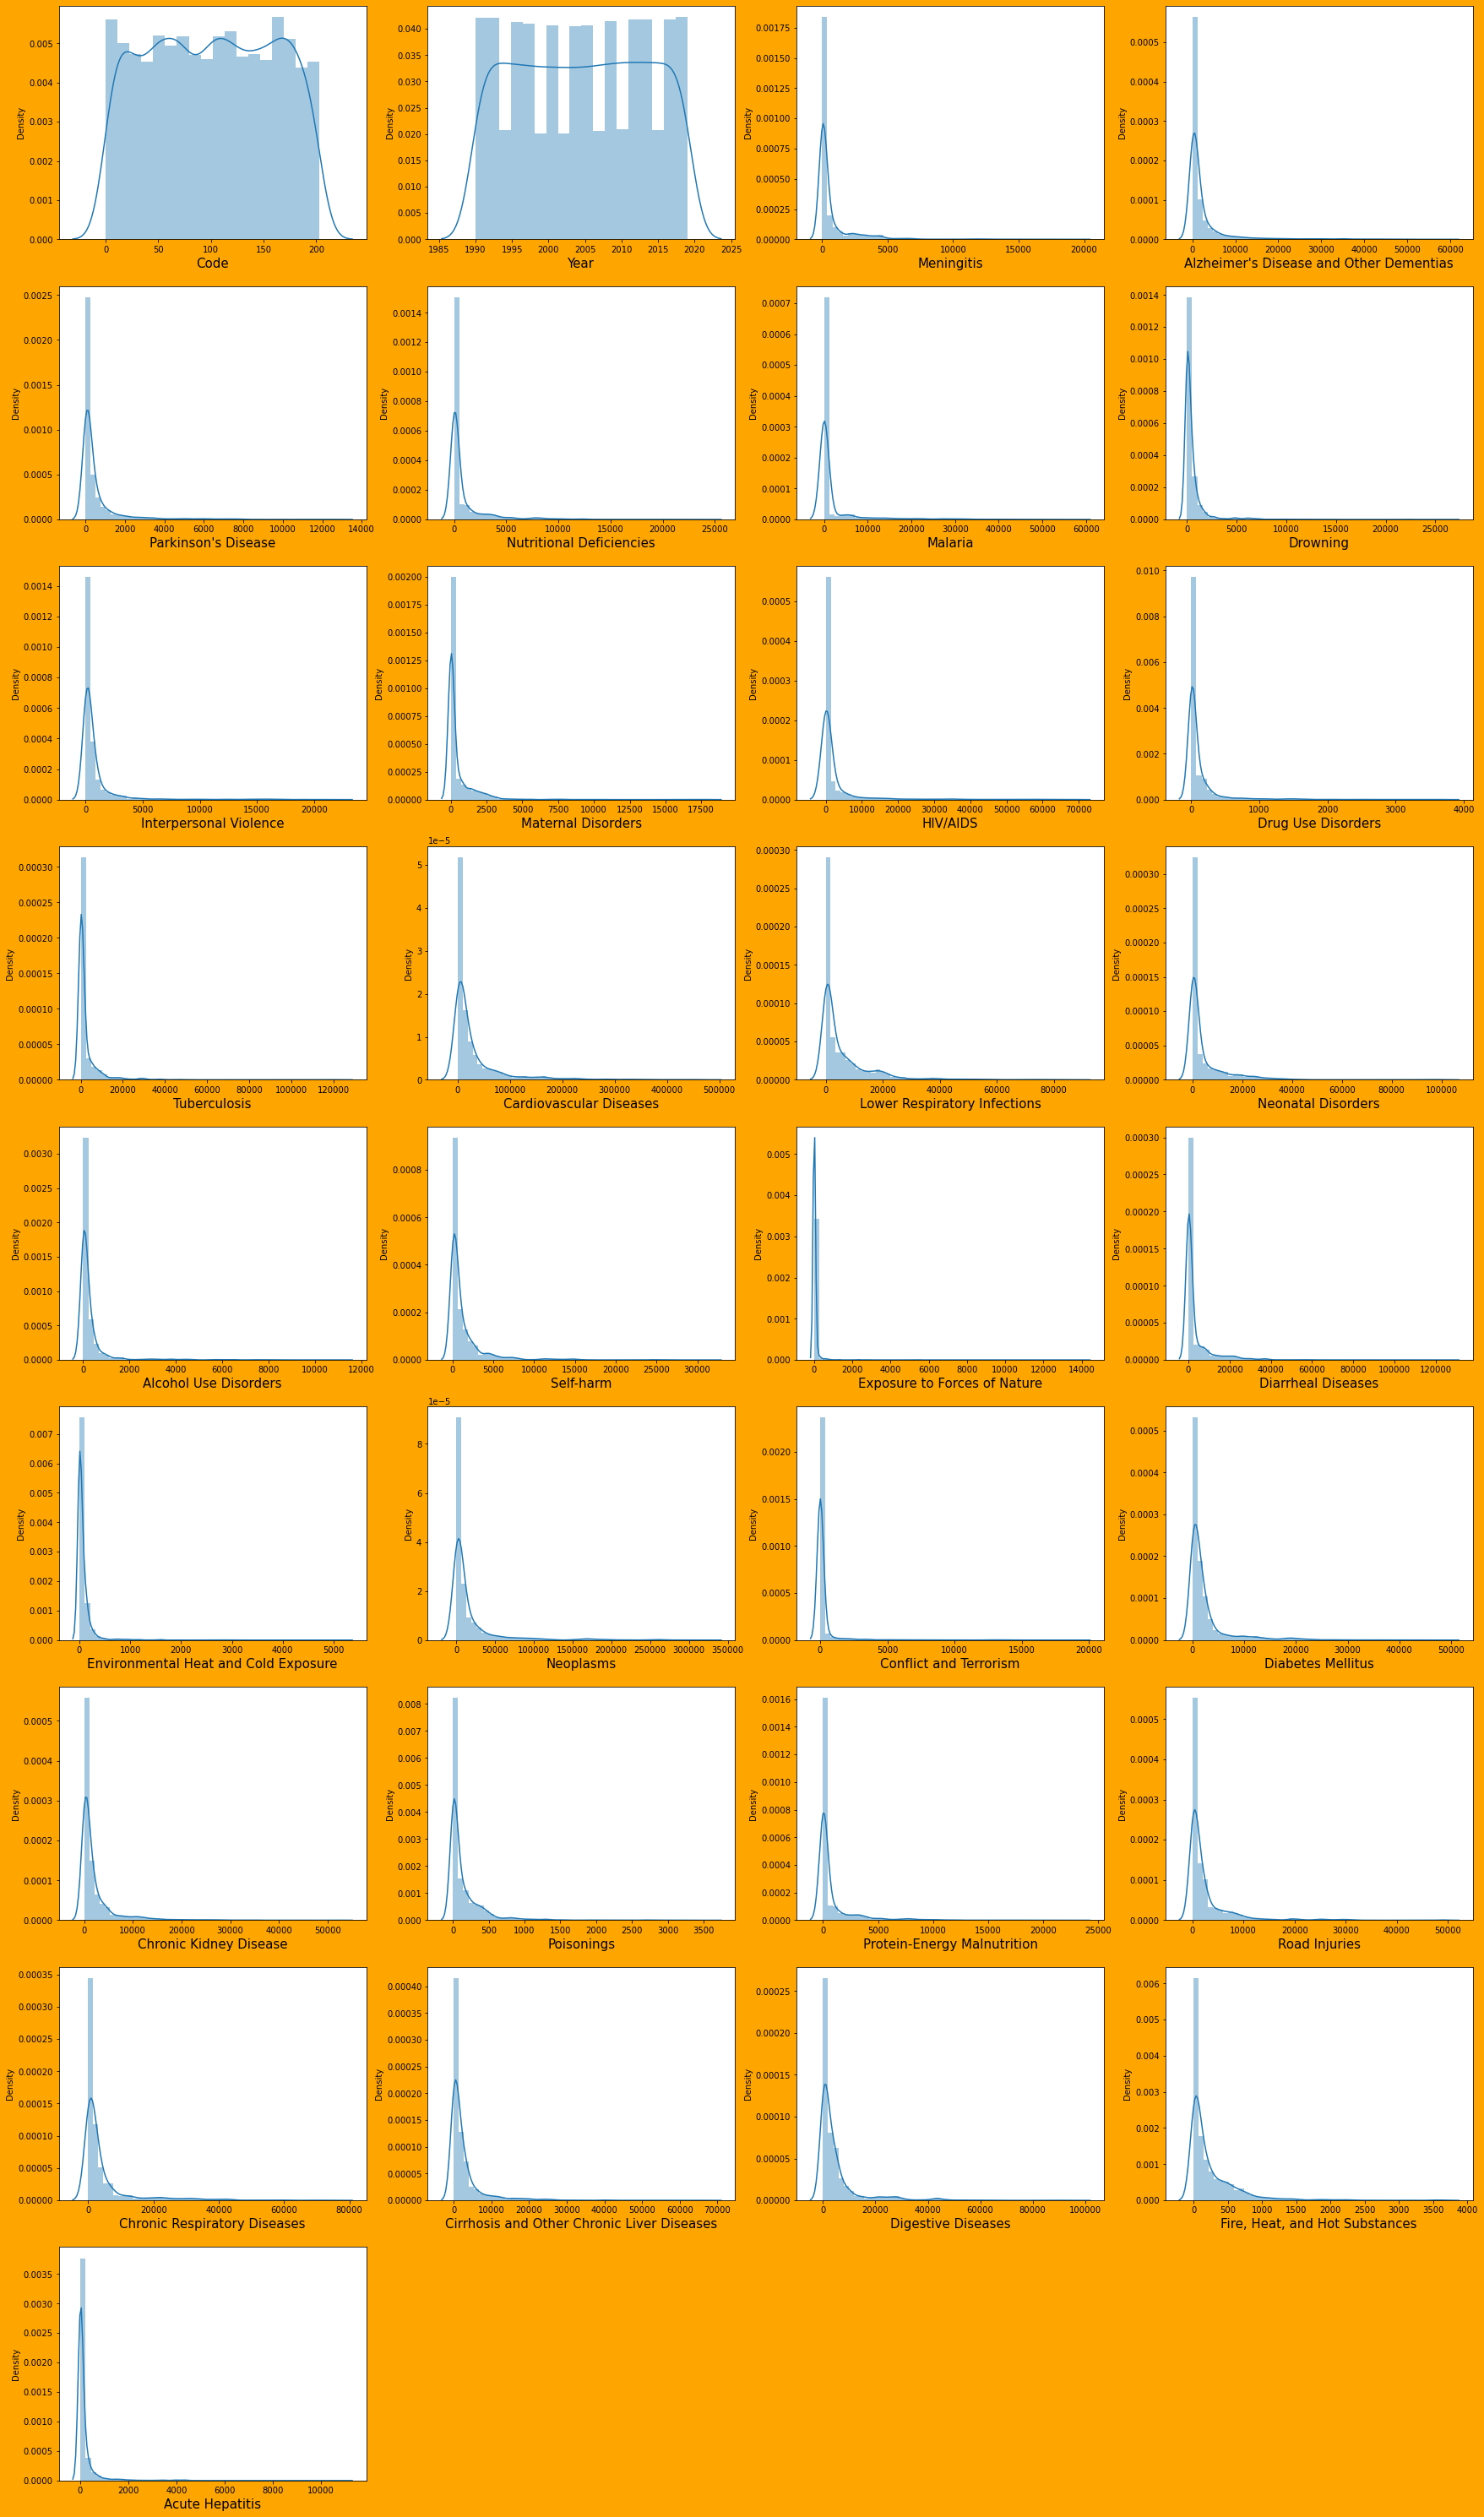

In [28]:
plt.figure(figsize=(30,60),facecolor='orange')
plotnumber=1
for column in data:
    if plotnumber<=35:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [29]:
data.skew()

Code                                          -0.003598
Year                                          -0.007182
Meningitis                                     4.646832
Alzheimer's Disease and Other Dementias        4.651183
Parkinson's Disease                            4.480600
Nutritional Deficiencies                       4.273068
Malaria                                        4.069679
Drowning                                       8.007881
Interpersonal Violence                         5.772383
Maternal Disorders                             6.727840
HIV/AIDS                                       5.129462
Drug Use Disorders                             5.631419
Tuberculosis                                   8.602218
Cardiovascular Diseases                        3.538685
Lower Respiratory Infections                   3.147003
Neonatal Disorders                             4.658411
Alcohol Use Disorders                          6.057064
Self-harm                                      4

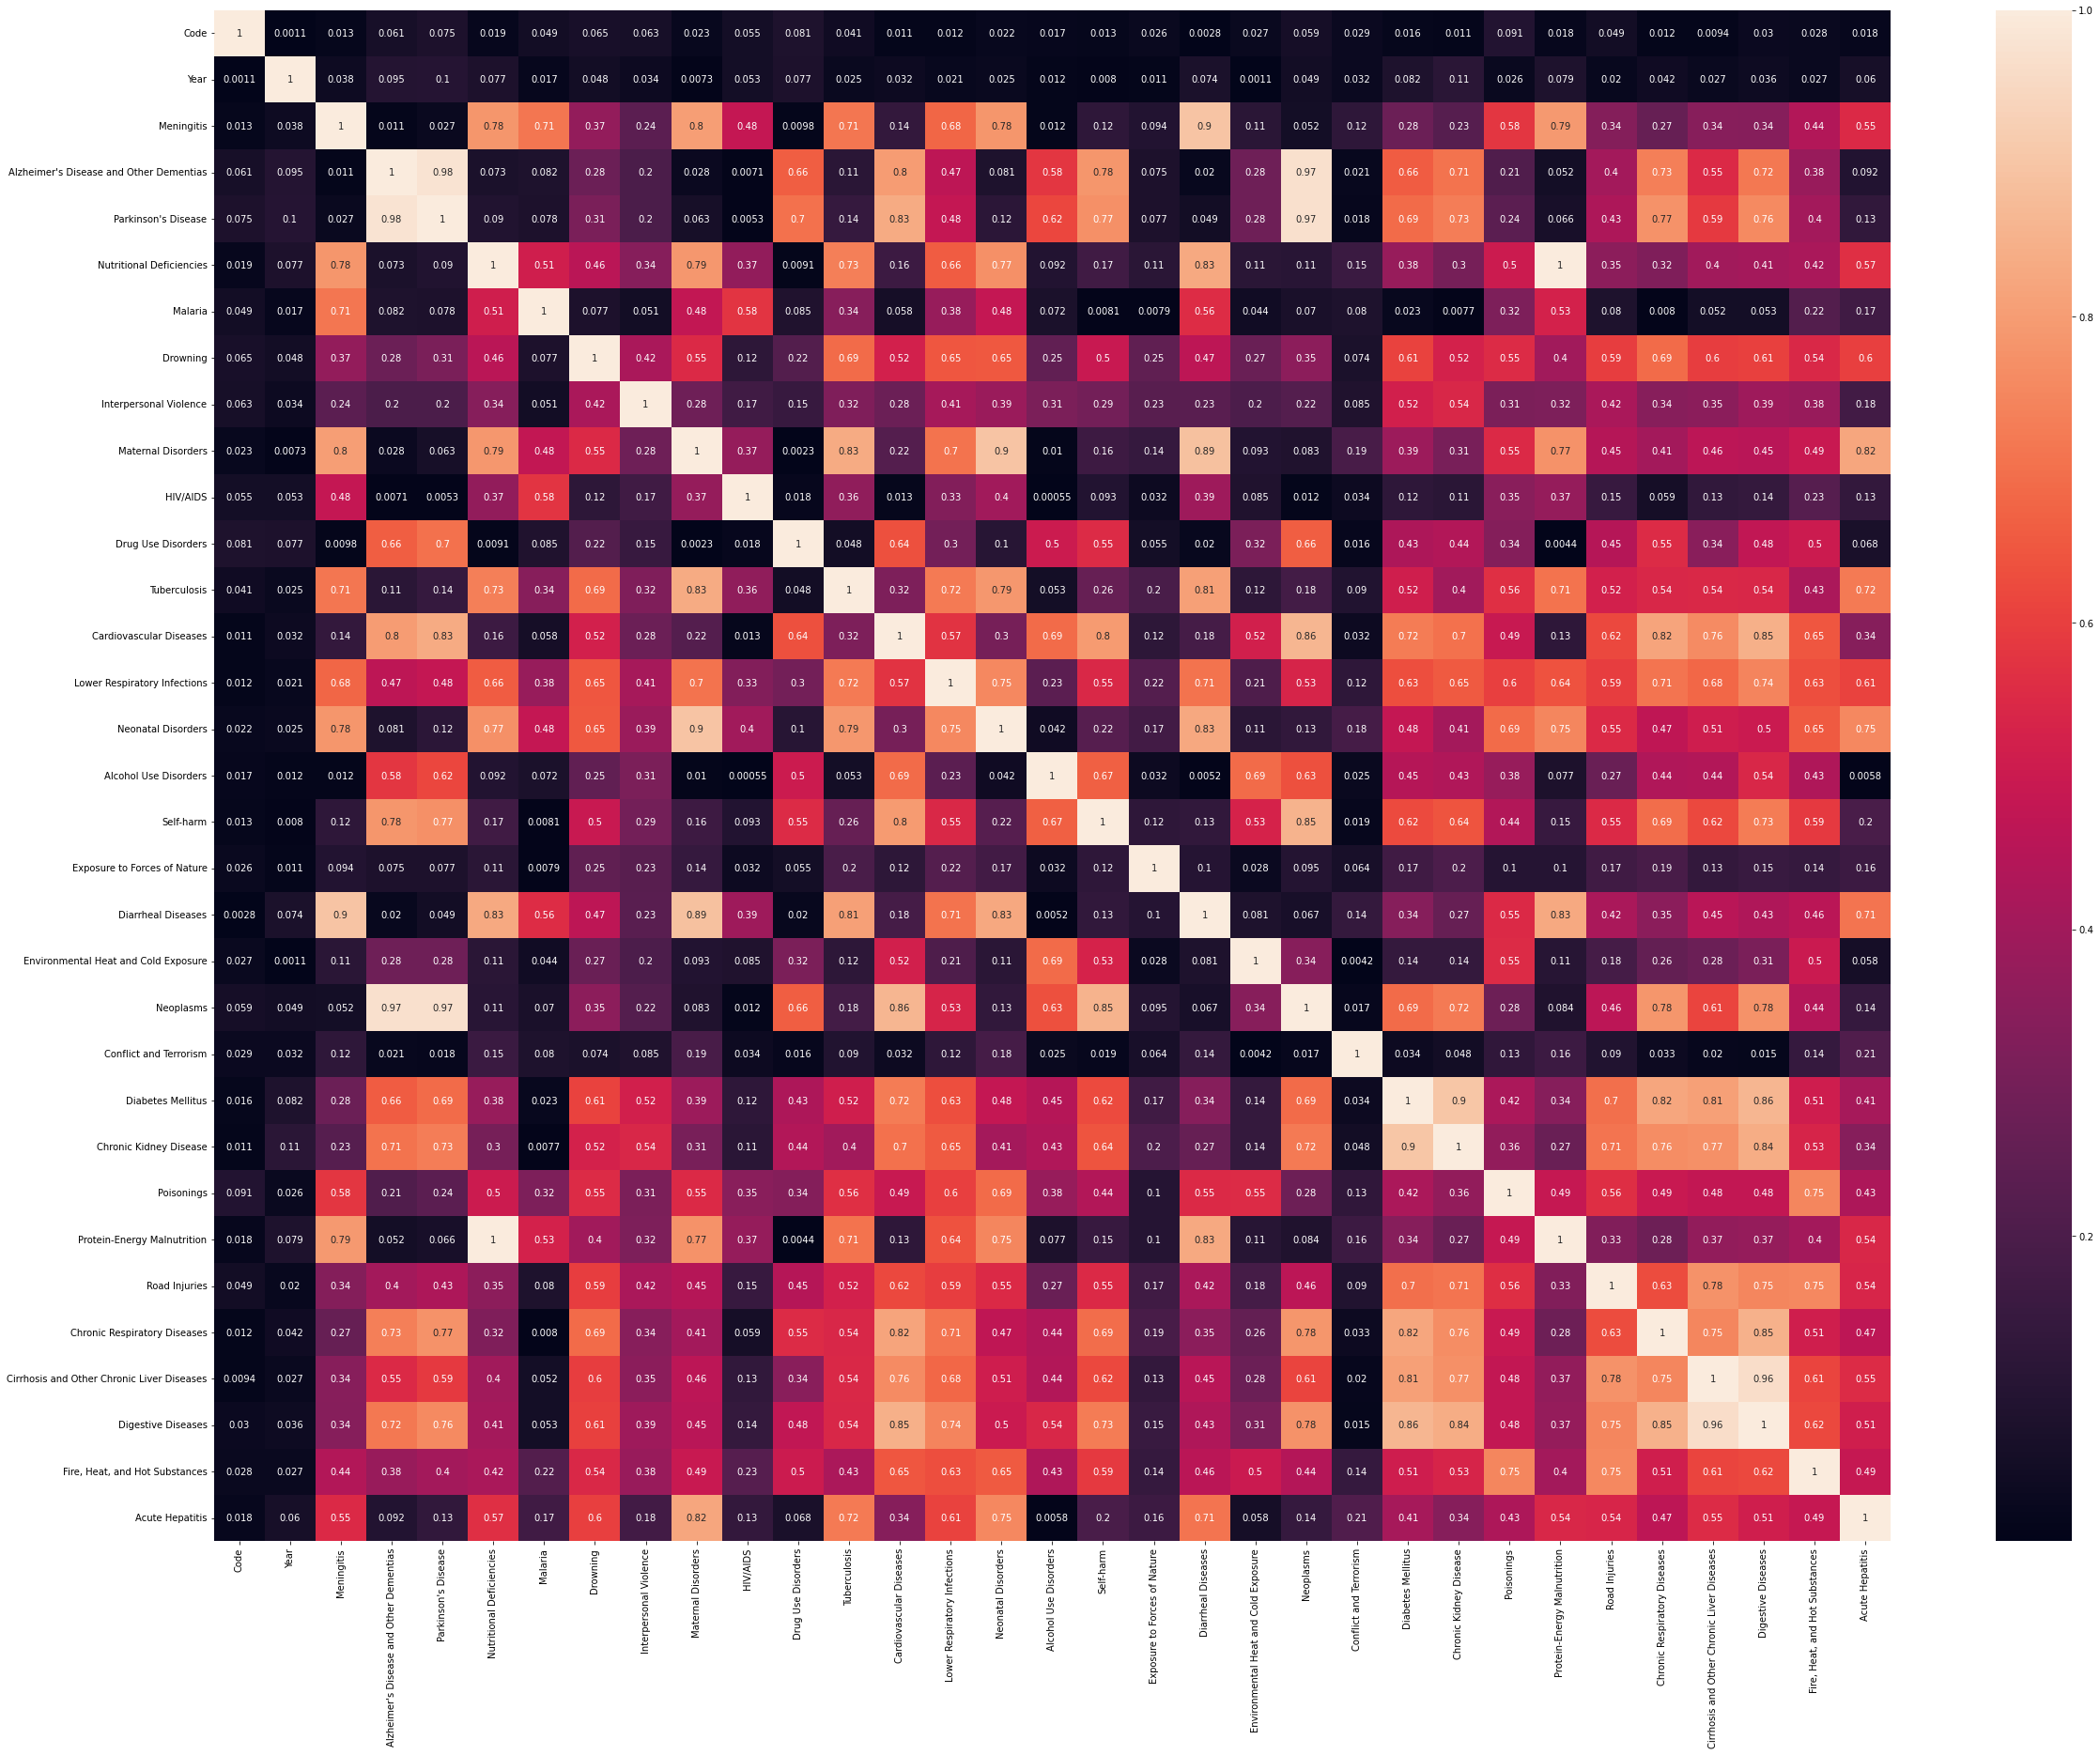

In [30]:
data_corr=data.corr().abs()
plt.figure(figsize=(40,30))
sns.heatmap(data_corr,annot=True, annot_kws={'size':10})
plt.show()